In [1]:
pip install pandas numpy scikit-learn xgboost seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickb1912/ipl-complete-dataset-20082020")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ipl-complete-dataset-20082020



🔍 Model Evaluation:

Accuracy Score: 0.5048076923076923

Classification Report:
                              precision    recall  f1-score   support

        Chennai Super Kings       0.57      0.62      0.59        26
            Deccan Chargers       0.00      0.00      0.00         3
             Delhi Capitals       0.38      0.50      0.43         6
           Delhi Daredevils       0.56      0.56      0.56        16
              Gujarat Lions       0.00      0.00      0.00         1
             Gujarat Titans       0.50      0.60      0.55         5
            Kings XI Punjab       0.25      0.29      0.27        14
       Kochi Tuskers Kerala       0.00      0.00      0.00         1
      Kolkata Knight Riders       0.56      0.47      0.51        30
       Lucknow Super Giants       1.00      0.67      0.80         3
             Mumbai Indians       0.52      0.71      0.60        24
              Pune Warriors       0.00      0.00      0.00         2
               Punja

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

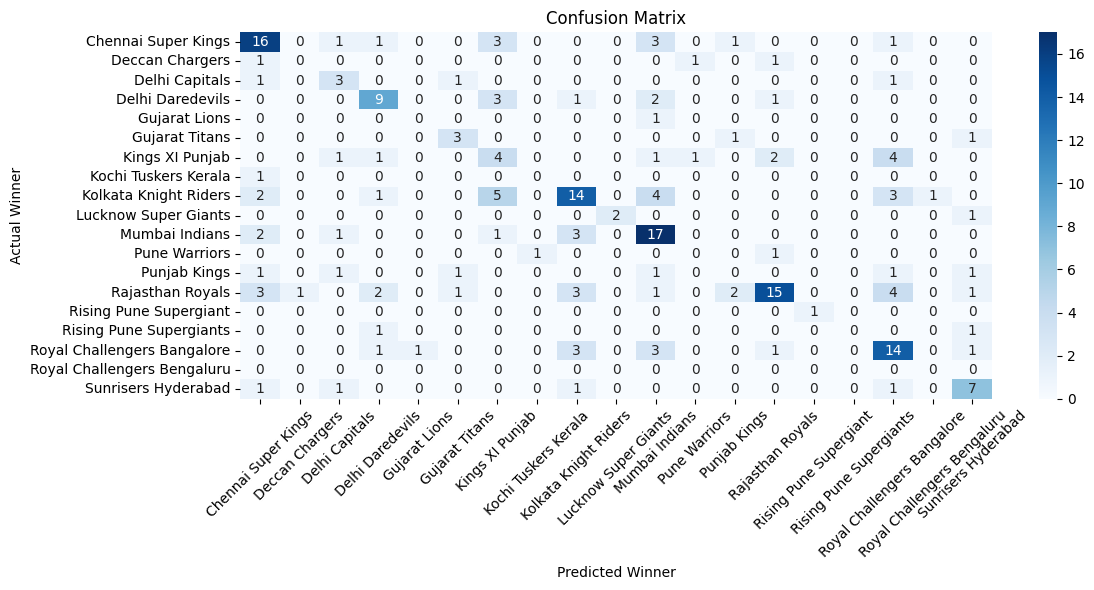

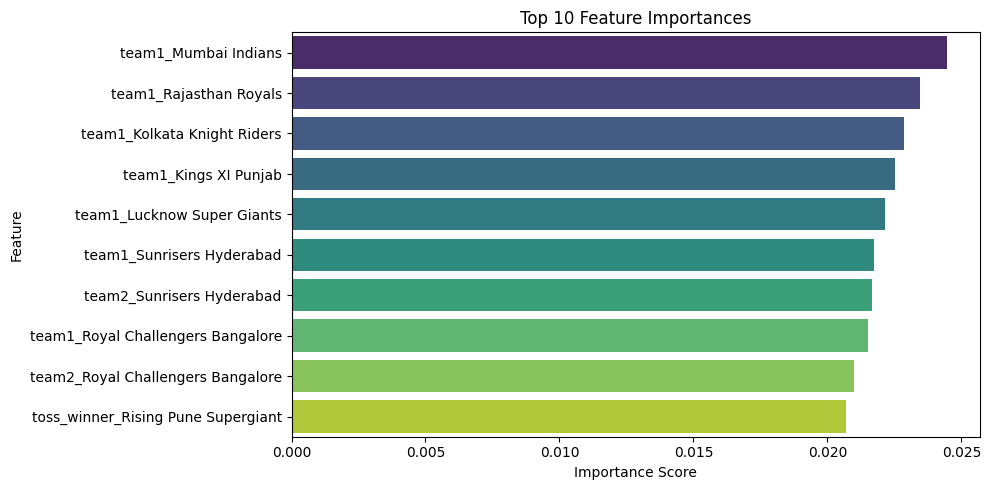

In [5]:
# IPL Match Winner Prediction (Pre-match) using XGB

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/matches.csv')

# Data preprocessing
df = df.dropna(subset=['winner'])
df = df[['season', 'city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]
df = df.dropna()
df['season'] = df['season'].apply(lambda x: int(str(x).split('/')[0]) if '/' in str(x) else int(x))

# Encode categorical features
categorical_cols = ['city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(df[categorical_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([df[['season']].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['winner'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=len(np.unique(y)),
    eval_metric='mlogloss',
    random_state=42
)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("\n Model Evaluation:\n")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, 
                                      target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Winner")
plt.ylabel("Actual Winner")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_features = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

/tmp/ipykernel_134/1303207235.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


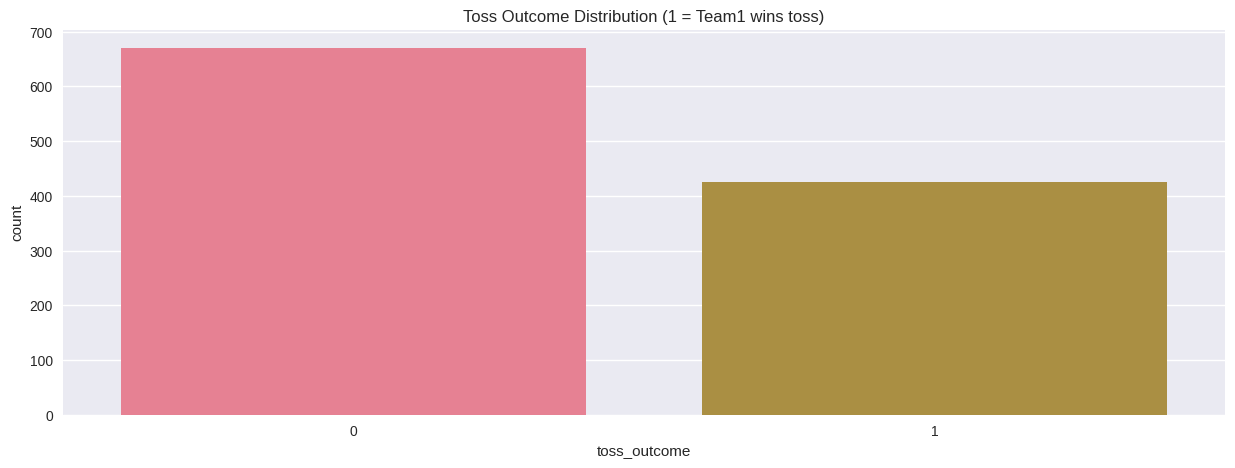

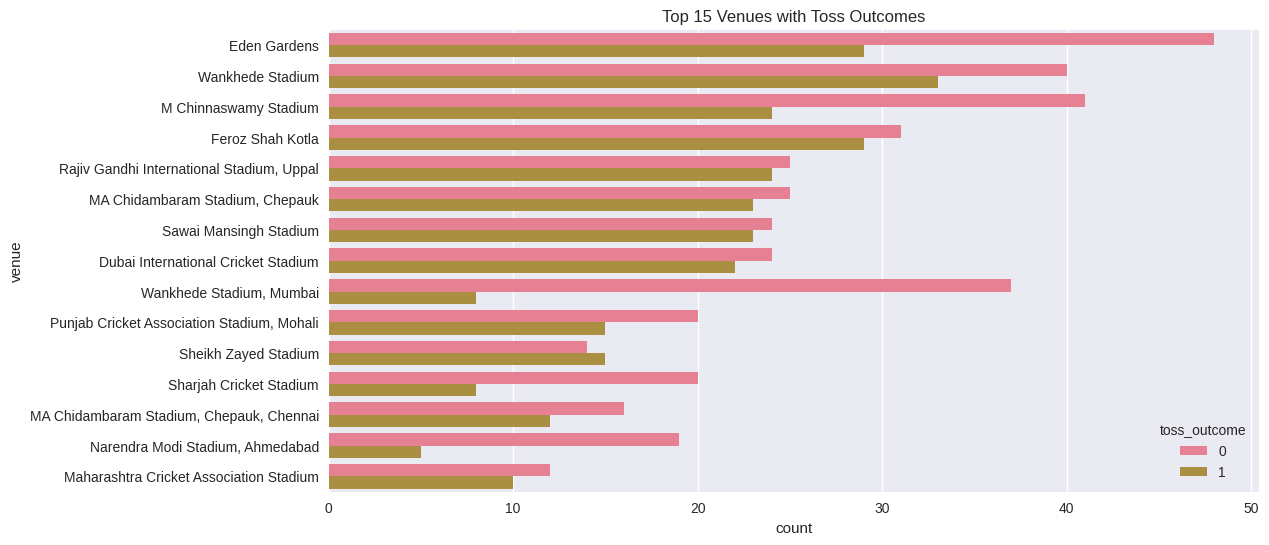

🔍 Model Performance:
Accuracy: 0.5525

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       140
           1       0.31      0.20      0.25        79

    accuracy                           0.55       219
   macro avg       0.47      0.48      0.46       219
weighted avg       0.51      0.55      0.52       219



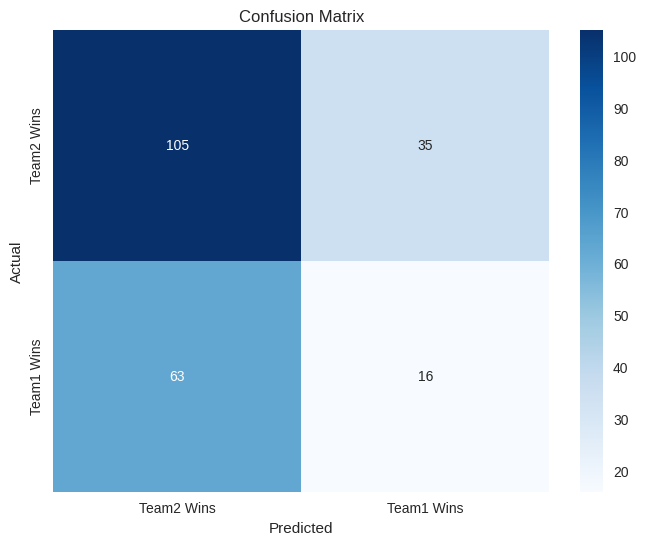

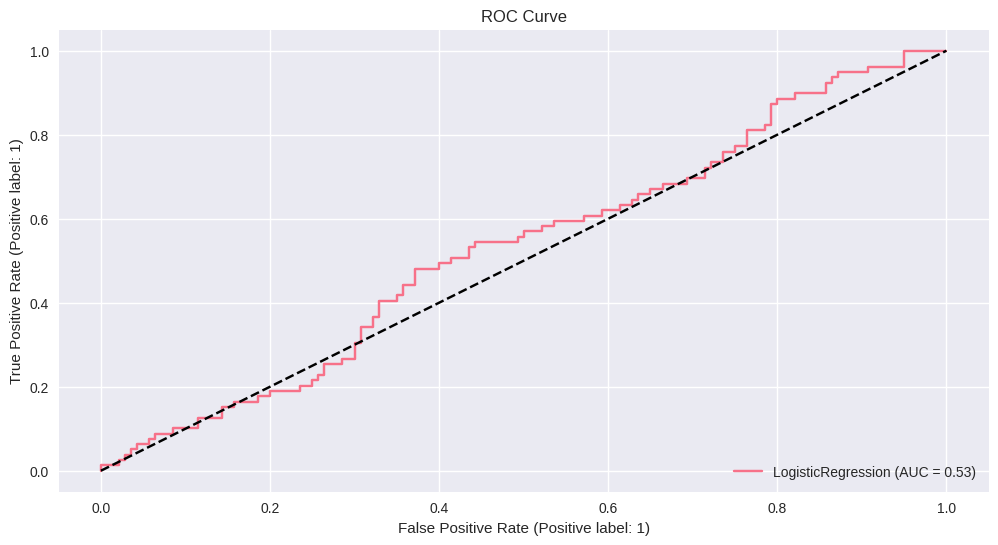

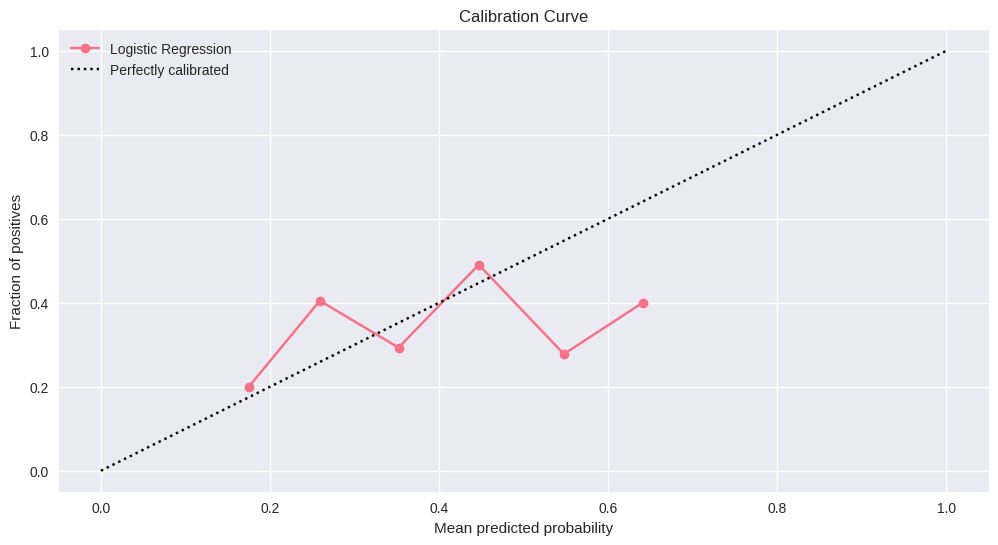

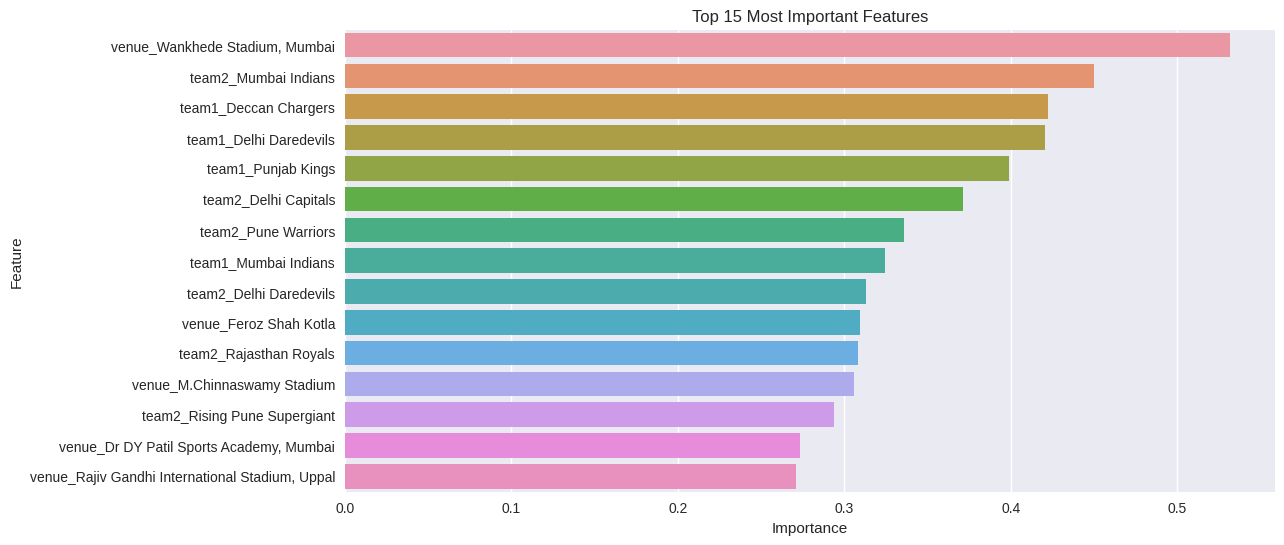

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


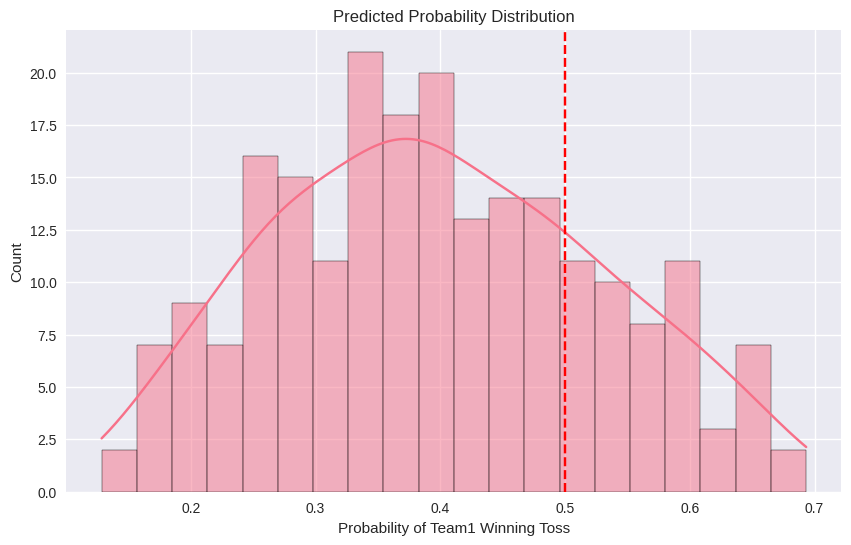

In [6]:
# Toss Winner Classifier using Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.calibration import calibration_curve

# Custom Styling for Visualizations
plt.style.use('seaborn')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]

# Load and Prepare Data
df = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/matches.csv')
df = df[['team1', 'team2', 'venue', 'date', 'toss_winner']].dropna()

# Prepare Target Variable (convert to binary: team1 wins toss = 1, else 0)
df['toss_outcome'] = np.where(df['toss_winner'] == df['team1'], 1, 0)

# Feature Engineering
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# Exploratory Data Analysis
plt.figure(figsize=(15, 5))
sns.countplot(x='toss_outcome', data=df)
plt.title('Toss Outcome Distribution (1 = Team1 wins toss)')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='venue', hue='toss_outcome', data=df, 
             order=df['venue'].value_counts().iloc[:15].index)
plt.title('Top 15 Venues with Toss Outcomes')
plt.show()

# 🔧 Feature Encoding
categorical_features = ['team1', 'team2', 'venue']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(df[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine features
X = pd.concat([X_encoded_df, df[['year', 'month', 'day_of_week']]], axis=1)
y = df['toss_outcome']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(" Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Advanced Visualizations
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Team2 Wins', 'Team1 Wins'],
            yticklabels=['Team2 Wins', 'Team1 Wins'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# 3. Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
plt.title('Calibration Curve')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.show()

# 4. Feature Importance (Top 15)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Top 15 Most Important Features')
plt.show()

# 5. Prediction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_proba, bins=20, kde=True)
plt.axvline(0.5, color='red', linestyle='--')
plt.title('Predicted Probability Distribution')
plt.xlabel('Probability of Team1 Winning Toss')
plt.ylabel('Count')
plt.show()

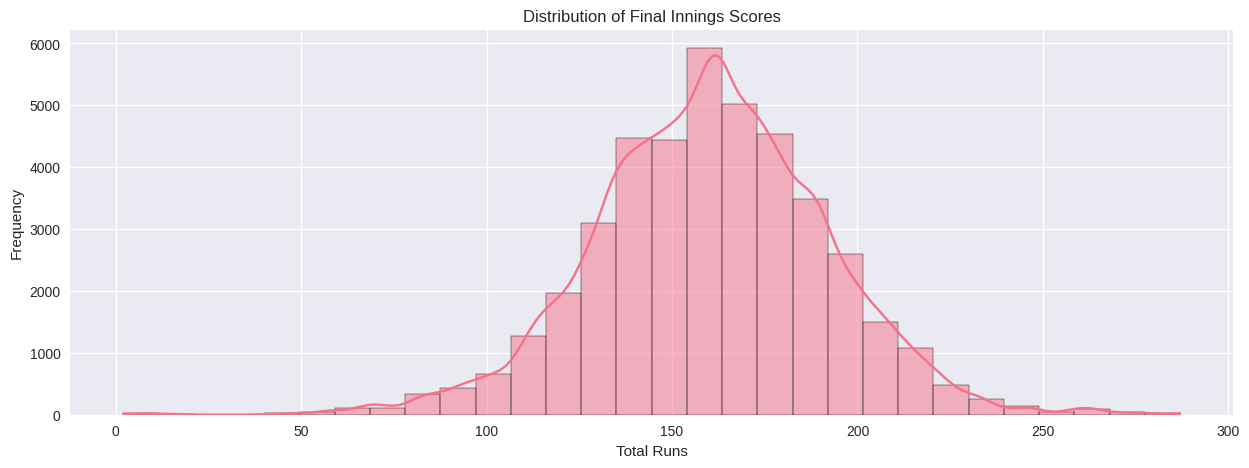

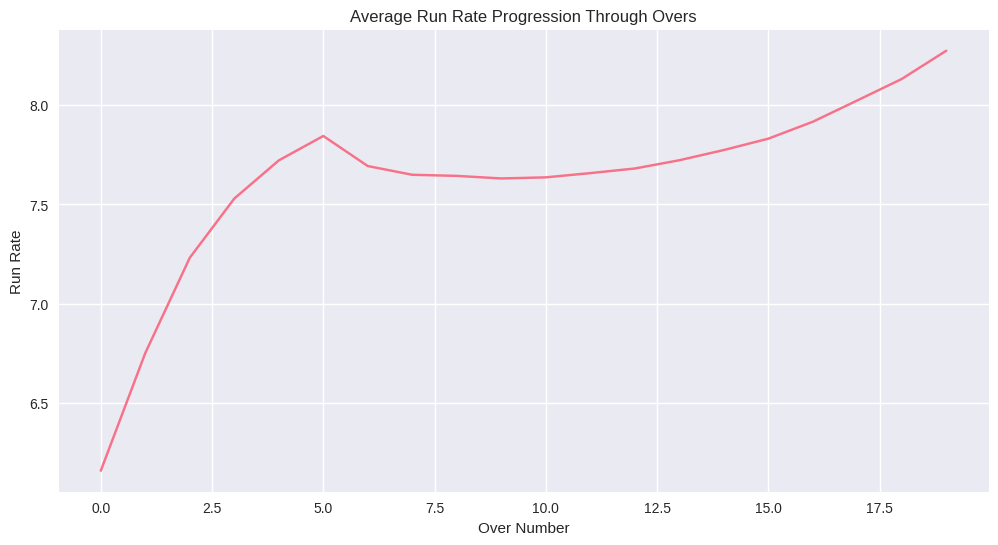

In [ ]:
# Batting Score Predictor using K-Nearest Neighbors (KNN)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Custom Styling
plt.style.use('seaborn')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]

# Load and Prepare Data
deliveries = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv')
matches = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/matches.csv')

# Feature Engineering - Aggregate by match, innings, and over
def prepare_dataset(deliveries, matches):
    # Merge with matches to get team names
    deliveries = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')
    
    # Calculate cumulative metrics per innings
    df = deliveries.groupby(['match_id', 'inning', 'batting_team']).agg({
        'over': 'max',
        'total_runs': 'sum',
        'player_dismissed': 'count',
        'ball': 'count'
    }).rename(columns={
        'player_dismissed': 'wickets',
        'ball': 'balls_bowled'
    }).reset_index()
    
    # Calculate over-by-over metrics
    over_data = deliveries.groupby(['match_id', 'inning', 'over']).agg({
        'total_runs': 'sum',
        'player_dismissed': 'count'
    }).groupby(['match_id', 'inning']).cumsum().reset_index()
    
    over_data = over_data.rename(columns={
        'total_runs': 'runs_after_over',
        'player_dismissed': 'wickets_after_over'
    })
    
    # Merge with final scores
    final_df = over_data.merge(df[['match_id', 'inning', 'total_runs']], 
                             on=['match_id', 'inning'])
    
    # Add batting team
    final_df = final_df.merge(deliveries[['match_id', 'inning', 'batting_team']].drop_duplicates(),
                            on=['match_id', 'inning'])
    
    # Calculate dynamic features
    final_df['run_rate'] = final_df['runs_after_over'] / (final_df['over'] + 1)
    final_df['remaining_overs'] = 20 - final_df['over']
    final_df['projected_score'] = final_df['runs_after_over'] + (final_df['run_rate'] * final_df['remaining_overs'])
    
    return final_df[['over', 'runs_after_over', 'wickets_after_over', 
                   'batting_team', 'run_rate', 'total_runs']]

df = prepare_dataset(deliveries, matches)

# Exploratory Data Analysis
plt.figure(figsize=(15, 5))
sns.histplot(df['total_runs'], bins=30, kde=True)
plt.title('Distribution of Final Innings Scores')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='over', y='run_rate', data=df, ci=None)
plt.title('Average Run Rate Progression Through Overs')
plt.xlabel('Over Number')
plt.ylabel('Run Rate')
plt.show()

# Train-Test Split
X = df[['over', 'runs_after_over', 'wickets_after_over', 'batting_team', 'run_rate']]
y = df['total_runs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Pipeline
numeric_features = ['over', 'runs_after_over', 'wickets_after_over', 'run_rate']
categorical_features = ['batting_team']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Model Pipeline with Hyperparameter Tuning
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 9, 11],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Model Evaluation
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Advanced Visualizations
# 1. Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.show()

# 2. Error Distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

# 3. Feature Importance (Permutation Importance)
from sklearn.inspection import permutation_importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=result.importances_mean[sorted_idx], 
            y=X.columns[sorted_idx])
plt.title("Feature Importance via Permutation")
plt.xlabel("Mean Accuracy Decrease")
plt.show()

# 4. Prediction by Over Number
X_test['prediction'] = y_pred
X_test['actual'] = y_test
plt.figure(figsize=(12, 6))
sns.lineplot(x='over', y='prediction', data=X_test, label='Predicted', ci=None)
sns.lineplot(x='over', y='actual', data=X_test, label='Actual', ci=None)
plt.title('Score Prediction by Over Number')
plt.xlabel('Over Number')
plt.ylabel('Total Score')
plt.legend()
plt.show()